In [13]:
%matplotlib inline

In [14]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [15]:
tf.reset_default_graph()

In [25]:
file = ['/Users/chris/gitspace/AIMind/medias/rd.jpg']
file_q = tf.train.string_input_producer(file)

reader = tf.WholeFileReader()
k,v = reader.read(file_q)

imgs = tf.image.decode_jpeg(v,channels=1)

In [34]:
filter_ = tf.constant(np.random.rand(2,2,1,1),dtype=np.float32,name='filter_')

with tf.Session() as sess:
    # sess.run(tf.global_variables_initializer)
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    
    src_image = sess.run(imgs)
    print(src_image.shape)
    
    input_ = tf.expand_dims(src_image,0)
        
    x = tf.cast(input_,tf.float32,name='x')
    res = tf.nn.conv2d(x,filter_,strides=[1,1,1,1],padding='SAME',name='conv')
    
    desc_image = sess.run(res)
    print(desc_image)
    
    coord.request_stop()
    coord.join(threads)

(426, 640, 1)
[[[[ 218.27728271]
   [ 218.27728271]
   [ 218.27728271]
   ..., 
   [ 302.60046387]
   [ 303.4972229 ]
   [ 162.74343872]]

  [[ 225.08843994]
   [ 225.08843994]
   [ 225.08843994]
   ..., 
   [ 315.0604248 ]
   [ 314.4135437 ]
   [ 168.2440033 ]]

  [[ 232.53341675]
   [ 232.53341675]
   [ 232.53341675]
   ..., 
   [ 327.25744629]
   [ 326.80773926]
   [ 174.6413269 ]]

  ..., 
  [[ 180.38067627]
   [ 180.89474487]
   [ 180.89474487]
   ..., 
   [ 177.55496216]
   [ 176.52540588]
   [  95.19451904]]

  [[ 179.48126221]
   [ 178.20181274]
   [ 178.20181274]
   ..., 
   [ 177.10525513]
   [ 174.72921753]
   [  93.40098572]]

  [[ 101.88247681]
   [ 100.98571777]
   [ 100.98571777]
   ..., 
   [ 100.53601074]
   [  99.18952942]
   [  65.46412659]]]]


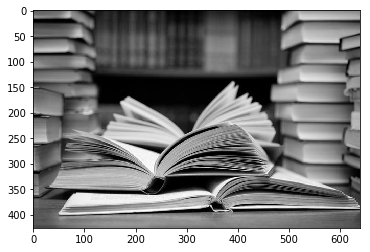

In [36]:
plt.imshow(src_image[:,:,0],cmap='gray');

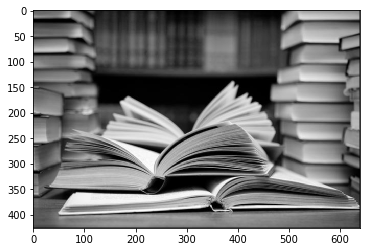

In [38]:
plt.imshow(desc_image[0,:,:,0],cmap='gray');